<h2 style="color:green" align="center">Predicting if an employee would leave the company based on several features using logistic regression</h2>

**This is a binary logistic regression problem as there are only two possible outcomes (i.e. if employee leaves the company or doesn't).**

In [116]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [117]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [118]:
df.shape

(14999, 10)

In [119]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [120]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [121]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [122]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [123]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Group by 'left' and calculate the mean
numeric_df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [124]:
import seaborn as sns

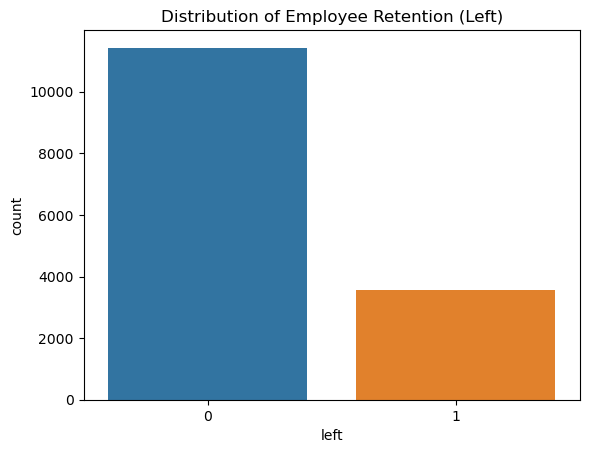

In [125]:
# Distribution of the target variable
sns.countplot(data=df, x='left')
plt.title('Distribution of Employee Retention (Left)')
plt.show()

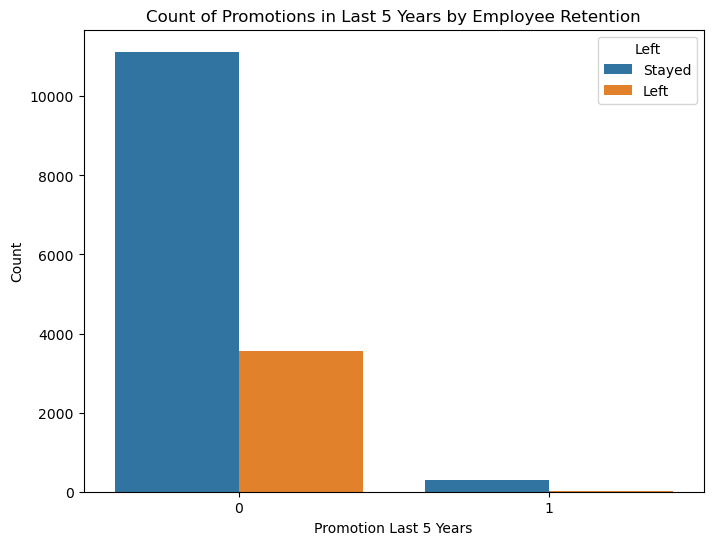

In [126]:
# Count plot for the binary variable 'promotion_last_5years'
plt.figure(figsize=(8, 6))
sns.countplot(x='promotion_last_5years', hue='left', data=df)
plt.title('Count of Promotions in Last 5 Years by Employee Retention')
plt.xlabel('Promotion Last 5 Years')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

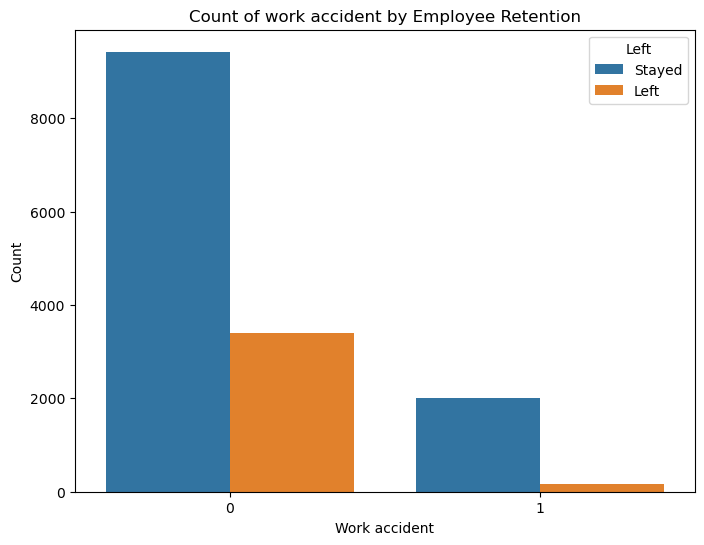

In [127]:
# Count plot for the binary variable 'work_accident'
plt.figure(figsize=(8, 6))
sns.countplot(x='Work_accident', hue='left', data=df)
plt.title('Count of work accident by Employee Retention')
plt.xlabel('Work accident')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

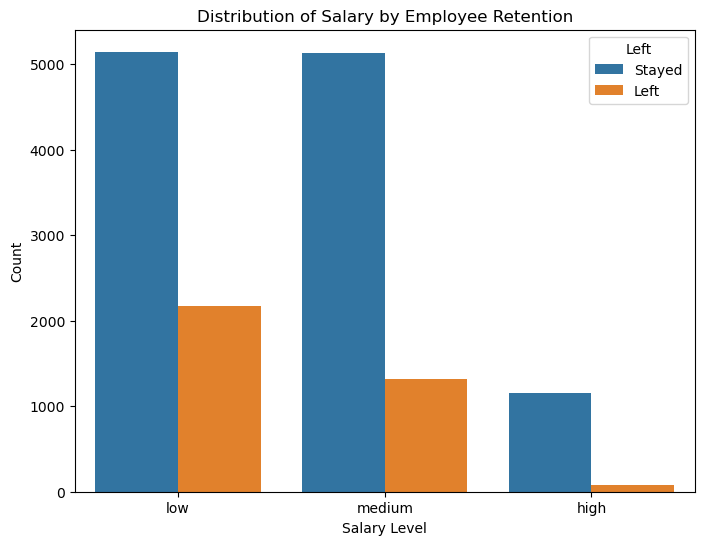

In [128]:
# Bar plot for the 'salary' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', hue='left', data=df)
plt.title('Distribution of Salary by Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

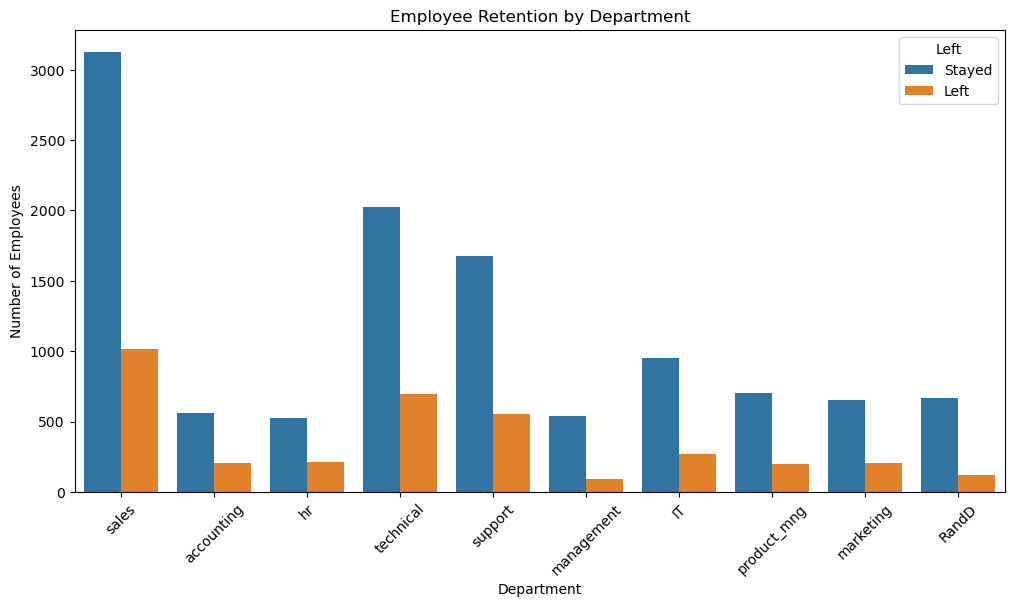

In [129]:
# Plot the distribution of 'Department' by 'left'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Department', hue='left')
plt.title('Employee Retention by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.xticks(rotation=45)
plt.show()

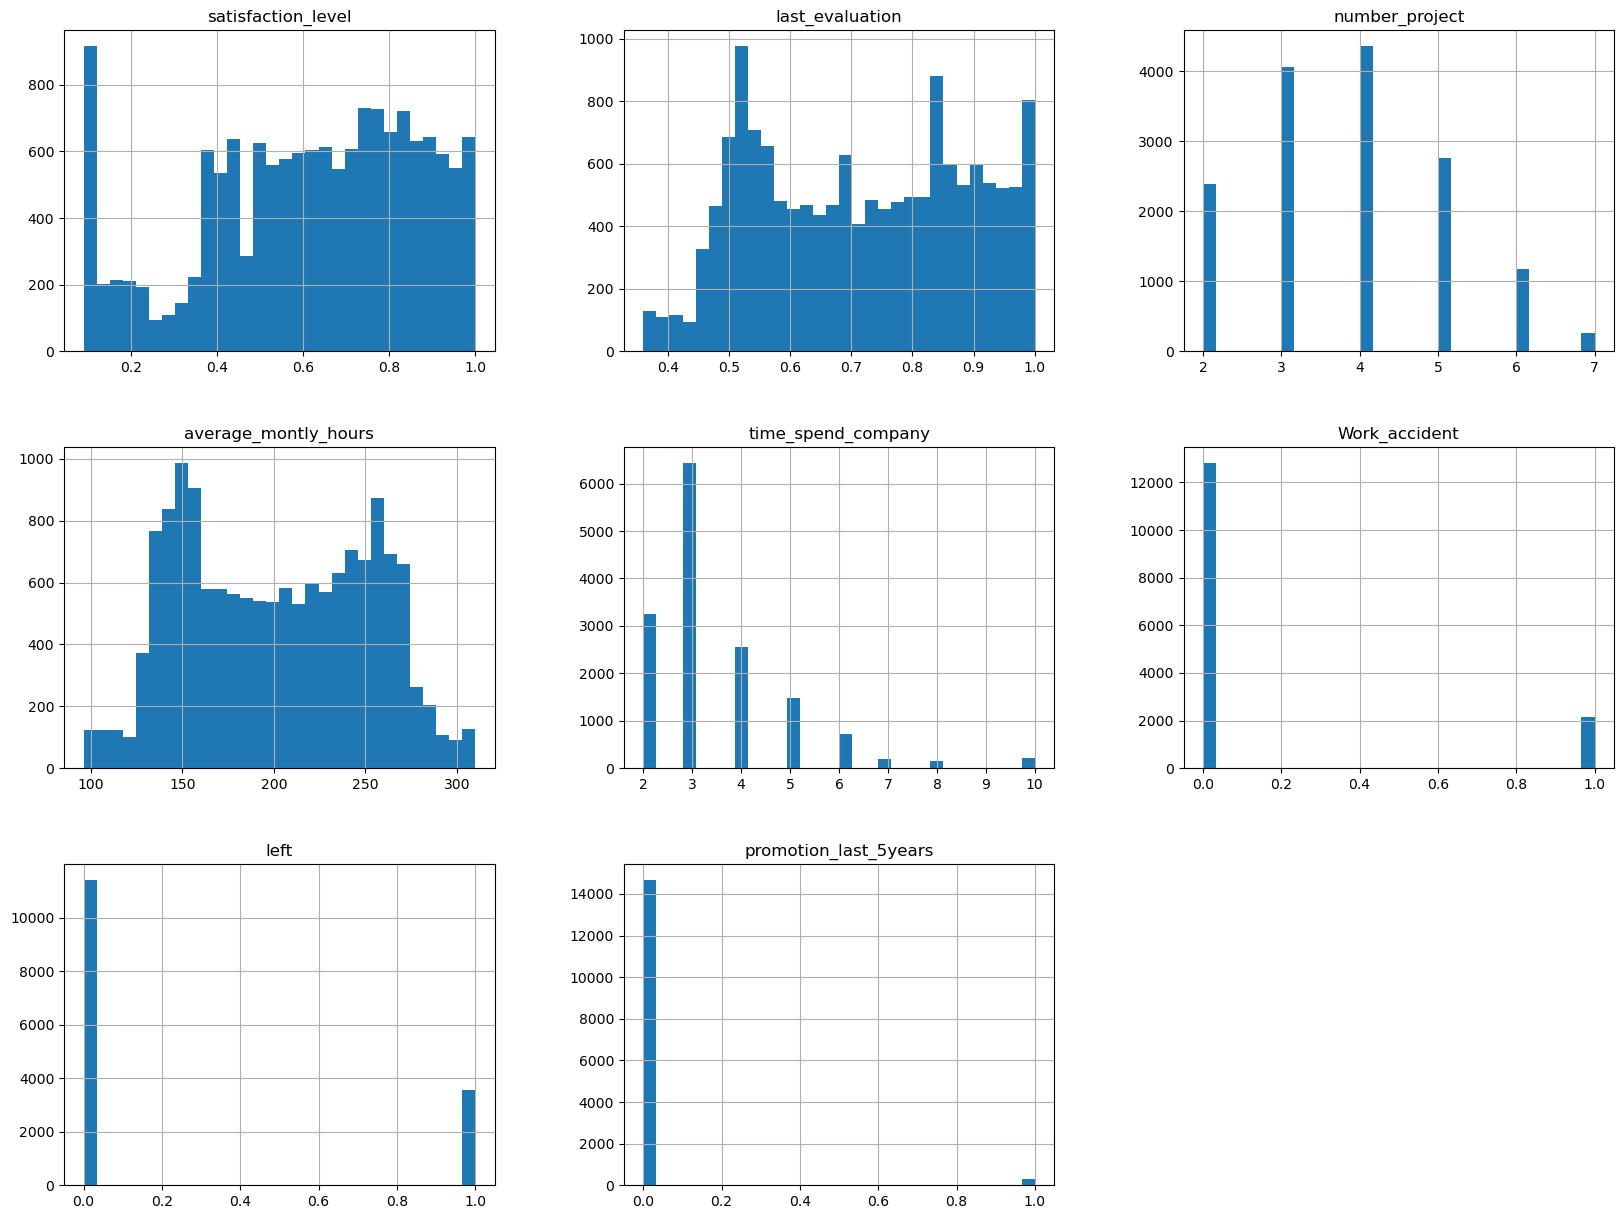

In [130]:
df.hist(figsize=(20, 15), bins=30)
plt.show()

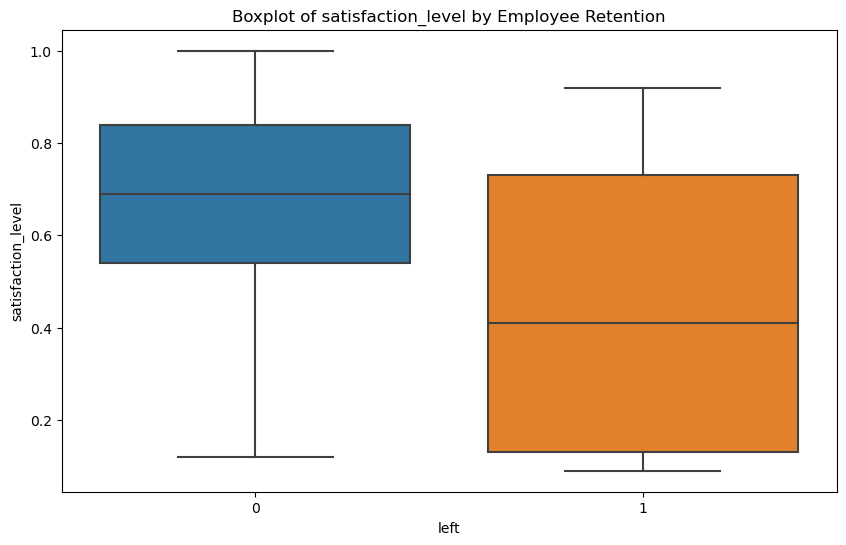

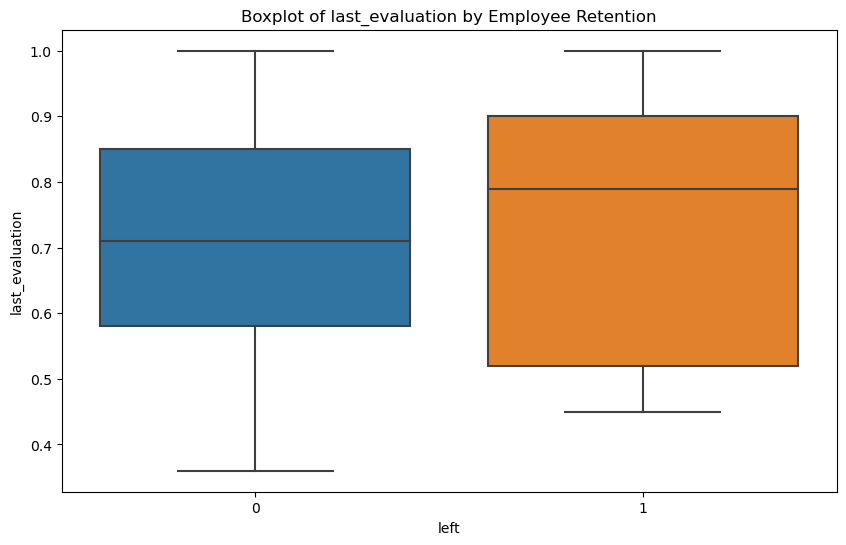

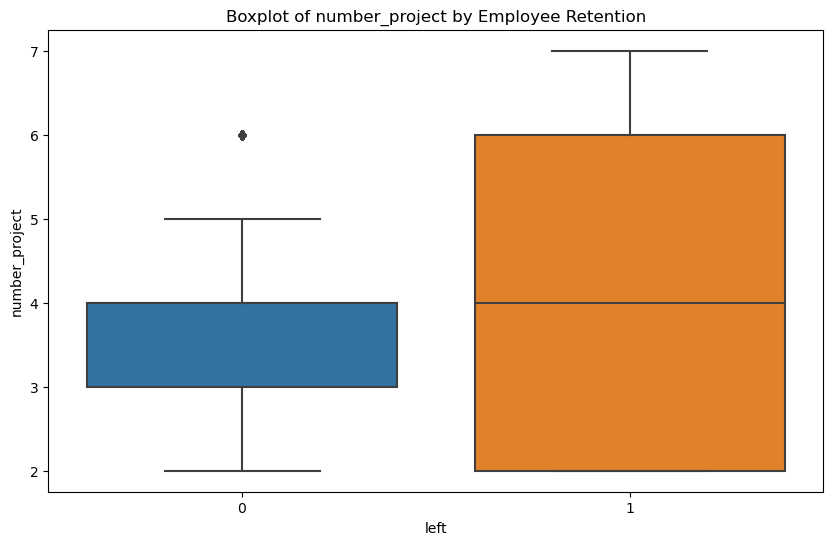

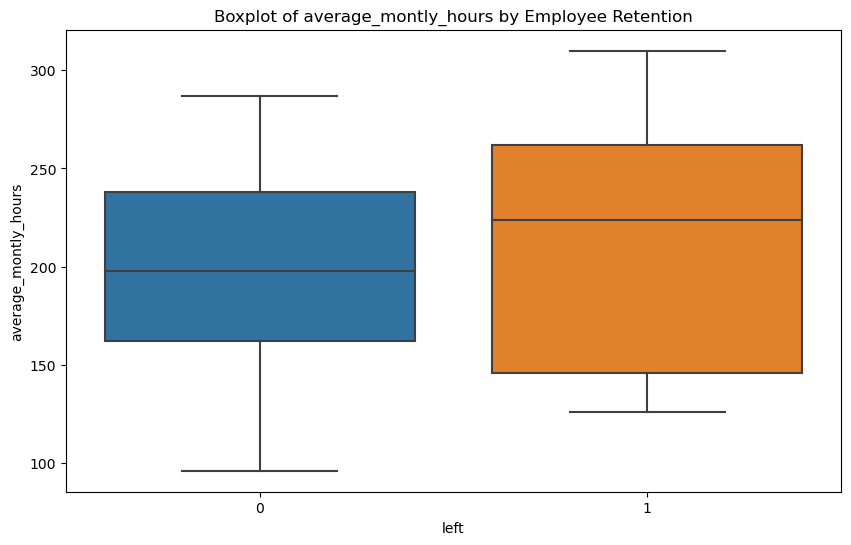

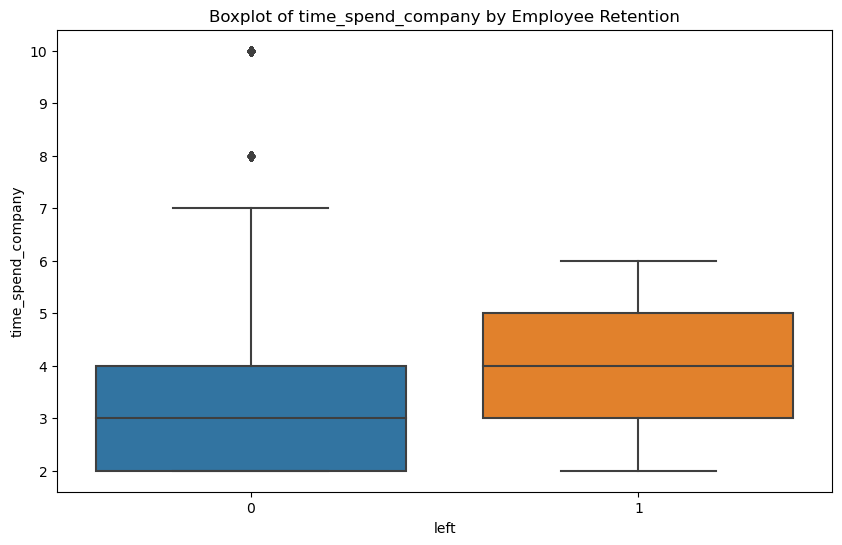

In [131]:
# Boxplots
for column in ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='left', y=column, data=df)
    plt.title(f'Boxplot of {column} by Employee Retention')
    plt.show()

In [132]:
df_new = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df_new.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


<h2 style='color:purple'>Feature engineering using pandas to create dummy variables</h2>

In [133]:
dummies = pd.get_dummies(df_new.salary)
dummies

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [134]:
dummies = dummies.astype(int)
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [135]:
merged = pd.concat([df_new,dummies],axis='columns')
merged.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [136]:
final = merged.drop(['salary','high'], axis='columns')
final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,low,medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0


In [137]:
X = final
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,low,medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0


In [138]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [141]:
X_train.shape

(10499, 5)

In [142]:
X_test.shape

(4500, 5)

In [143]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [144]:
model.fit(X_train, y_train)

LogisticRegression()

In [145]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
model.predict_proba(X_test)

array([[0.98397972, 0.01602028],
       [0.85707225, 0.14292775],
       [0.63218354, 0.36781646],
       ...,
       [0.79031763, 0.20968237],
       [0.71051076, 0.28948924],
       [0.73887142, 0.26112858]])

In [147]:
model.score(X_test,y_test)

0.7646666666666667

<h2 style='color:purple'>Using sklearn OneHotEncoder</h2>

First step is to use label encoder to convert town names into numbers

In [148]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [149]:
dfle = df_new
dfle['salary'] = le.fit_transform(dfle['salary'])
dfle

C:\Users\THINKUP\AppData\Local\Temp\ipykernel_10640\2609651628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfle['salary'] = le.fit_transform(dfle['salary'])


,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,1
1,0.80,262,0,2
2,0.11,272,0,2
3,0.72,223,0,1
4,0.37,159,0,1
...,...,...,...,...
14994,0.40,151,0,1
14995,0.37,160,0,1
14996,0.37,143,0,1
14997,0.11,280,0,1


In [150]:
X = dfle.values
X

array([[3.80e-01, 1.57e+02, 0.00e+00, 1.00e+00],
       [8.00e-01, 2.62e+02, 0.00e+00, 2.00e+00],
       [1.10e-01, 2.72e+02, 0.00e+00, 2.00e+00],
       ...,
       [3.70e-01, 1.43e+02, 0.00e+00, 1.00e+00],
       [1.10e-01, 2.80e+02, 0.00e+00, 1.00e+00],
       [3.70e-01, 1.58e+02, 0.00e+00, 1.00e+00]])

In [151]:
y = df['left'].values
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [154]:
model.fit(X_train,y_train)

LogisticRegression()

In [155]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [156]:
model.score(X_test,y_test)

0.7702222222222223

**model.coef_ indicates value of m in y=m*x + b equation**

In [157]:
model.coef_

array([[-3.77220949e+00,  2.29020164e-03, -1.72211338e+00,
         1.39057785e-02]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [158]:
model.intercept_

array([0.48223969])

**Lets define sigmoid function now and do the math with it**

In [159]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [160]:
def prediction_function(average_montly_hours):
    z = 2.21523822e-03 * average_montly_hours - -0.95930663 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [161]:
average_montly_hours = 266
prediction_function(average_montly_hours)

0.8247056532778597

**0.824 is greater than 0.5 which means employee is likely to leave, but this based only on average_montly_hours because we have to take into consideration also other variables**